In [4]:
import numpy as np
import pandas as pd
moviedf = pd.read_csv('movies.csv')
linkdf = pd.read_csv('links.csv')
ratingdf = pd.read_csv('ratings.csv')
tagdf = pd.read_csv('tags.csv')

In [5]:
moviedf.shape

(9742, 3)

In [6]:
ratingdf.shape

(100836, 4)

In [7]:
len(pd.unique(ratingdf['userId']))

610

In [10]:
print(ratingdf["movieId"].value_counts())

movieId
356       329
318       317
296       307
593       279
2571      278
         ... 
86279       1
86922       1
5962        1
87660       1
163981      1
Name: count, Length: 9724, dtype: int64


In [12]:
moviedf[moviedf["movieId"]==356]["title"].unique()

array(['Forrest Gump (1994)'], dtype=object)

In [14]:
movie_id = moviedf.loc[moviedf['title'] == 'Matrix, The (1999)', 'movieId'].iloc[0]
tags = tagdf.loc[tagdf['movieId'] == movie_id, 'tag']
print(f'{tags=}')

tags=815           martial arts
816                 sci-fi
1646    alternate universe
2794            philosophy
2795      post apocalyptic
Name: tag, dtype: object


In [15]:
movie_id = moviedf.loc[moviedf['title'] == 'Terminator 2: Judgment Day (1991)', 'movieId'].iloc[0]
avg_rating = ratingdf.loc[ratingdf['movieId'] == movie_id, 'rating'].mean()
print(f'{avg_rating=}')

avg_rating=3.970982142857143


<Axes: >

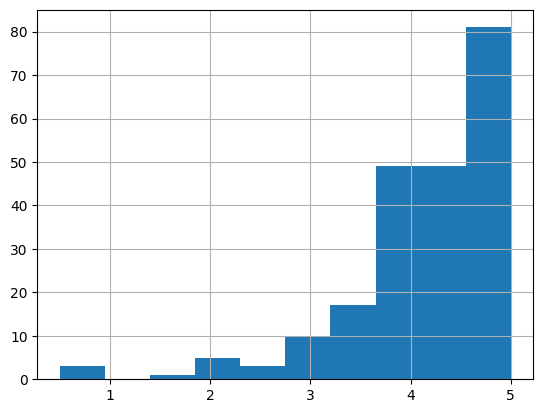

In [16]:
fratings = ratingdf[ratingdf['movieId'] == moviedf[moviedf['title'] == 'Fight Club (1999)']['movieId'].iloc[0]]['rating']
fratings.hist()

In [17]:
rating_stats = ratingdf.groupby('movieId')['rating'].agg(['count', 'mean'])
print(f'{rating_stats=}')
rating_stats = rating_stats.rename(columns={'count': 'rating_count'})
movie_stats = moviedf.join(rating_stats, on='movieId', how='inner')
print(f'{movie_stats=}')
filtered_movies = movie_stats[movie_stats['rating_count'] > 50]
print(f'{filtered_movies=}')

rating_stats=         count      mean
movieId                 
1          215  3.920930
2          110  3.431818
3           52  3.259615
4            7  2.357143
5           49  3.071429
...        ...       ...
193581       1  4.000000
193583       1  3.500000
193585       1  3.500000
193587       1  3.500000
193609       1  4.000000

[9724 rows x 2 columns]
movie_stats=      movieId                                      title  \
0           1                           Toy Story (1995)   
1           2                             Jumanji (1995)   
2           3                    Grumpier Old Men (1995)   
3           4                   Waiting to Exhale (1995)   
4           5         Father of the Bride Part II (1995)   
...       ...                                        ...   
9737   193581  Black Butler: Book of the Atlantic (2017)   
9738   193583               No Game No Life: Zero (2017)   
9739   193585                               Flint (2017)   
9740   193587        Bung

In [18]:
popular_movie = movie_stats[movie_stats['rating_count'] > 50].sort_values('mean', ascending=False).iloc[0]['title']
print(f'{popular_movie=}')

popular_movie='Shawshank Redemption, The (1994)'


In [19]:
top_5_movies = movie_stats.sort_values('rating_count', ascending=False).head(5)['title'].tolist()
print(f'{top_5_movies=}')
scifi_movies = movie_stats[movie_stats['genres'].str.contains('Sci-Fi')]
third_popular = scifi_movies.sort_values('rating_count', ascending=False).iloc[2]['title']
print(f'{third_popular=}')

top_5_movies=['Forrest Gump (1994)', 'Shawshank Redemption, The (1994)', 'Pulp Fiction (1994)', 'Silence of the Lambs, The (1991)', 'Matrix, The (1999)']
third_popular='Jurassic Park (1993)'


In [20]:
highest_rated_movie_id = movie_stats.loc[movie_stats['mean'].idxmax(), 'movieId']
print(f'{highest_rated_movie_id=}')


highest_rated_movie_id=53


In [21]:
highest_rated_scifi_movie_id = scifi_movies.loc[scifi_movies['mean'].idxmax(), 'movieId']
print(f'{highest_rated_scifi_movie_id=}')

highest_rated_scifi_movie_id=3687
